In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils.image_array import NumpyImage
from utils.func import morph_transform
import matplotlib as mpl

mpl.rcParams['image.cmap'] = 'binary'

### erozja



to operacja przetwarzania obrazu, która "kurczy" jasne obszary obiektów na obrazie binarnym.

#### Zasada działania

- Usuwa piksele z krawędzi obiektów
- Działa zgodnie z kształtem elementu strukturalnego (kernel)
- Zmniejsza rozmiar białych obszarów na czarnym tle

#### Zastosowania

- Usuwanie szumu i małych artefaktów
- Separowanie połączonych obiektów
- Zmniejszanie grubości linii
- Przygotowanie do dalszych operacji morfologicznych

#### Przykład

> Jeśli masz białą literę na czarnym tle, erozja zmniejszy jej grubość lub może całkowicie usunąć cienkie elementy jak kropki nad "i".

#### Powiązane operacje

Erozja jest często parowana z **dylacją** (dilation) - operacją odwrotną, która rozszerza obiekty. Kombinacja tych operacji tworzy bardziej złożone filtry morfologiczne jak **opening** i **closing**.

![](assets/erode.png)

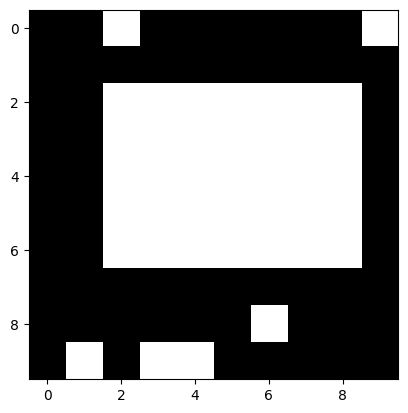

In [17]:
img = np.array(
    [
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    ],
    dtype='uint8',
)
plt.imshow(img)
plt.show()

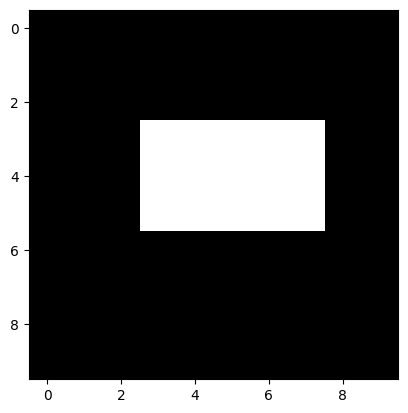

In [18]:
kernel = np.ones((3, 3), np.uint8)
eroded_img_custom = morph_transform(img, kernel)

plt.imshow(eroded_img_custom)
plt.show()

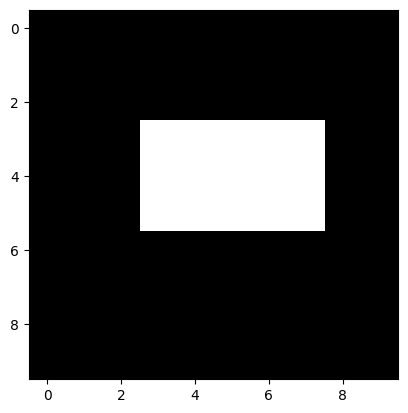

In [19]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded_img_cv_1 = cv2.erode(img, kernel)

plt.imshow(eroded_img_cv_1)
plt.show()

In [20]:
np.array_equal(eroded_img_custom,eroded_img_cv_1)

True

In [21]:
eroded_img_cv_2 = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

In [22]:
np.array_equal(eroded_img_custom, eroded_img_cv_2)

True

### dylatacja

operacja przetwarzania obrazu, która "rozszerza" jasne obszary obiektów na obrazie binarnym

#### Zasada działania

- Dodaje piksele do krawędzi obiektów
- Działa zgodnie z kształtem elementu strukturalnego (kernel)
- Zwiększa rozmiar białych obszarów na czarnym tle
- Jest operacją odwrotną do erozji

#### Zastosowania

- Wypełnianie małych dziur w obiektach
- Łączenie blisko siebie położonych elementów
- Zwiększanie grubości linii
- Rekonstrukcja obiektów po erozji
- Wygładzanie krawędzi obiektów

#### Przykład

> Jeśli masz białą literę z przerwami na czarnym tle, dylatacja może zamknąć te przerwy i sprawić, że litera będzie bardziej zwarta i czytelna.

#### Powiązane operacje

Dylatacja jest często używana w kombinacji z **erozją**:
- **Opening** = erozja + dylatacja (usuwa szum, zachowuje kształt)
- **Closing** = dylatacja + erozja (wypełnia dziury, łączy obiekty)

#### Erozja vs Dylatacja

| Erozja | Dylatacja |
|--------|-----------|
| Kurczy obiekty | Rozszerza obiekty |
| Usuwa szum | Wypełnia dziury |
| Rozdziela obiekty | Łączy obiekty |
| Zmniejsza grubość | Zwiększa grubość |

![](assets/dilate.png)

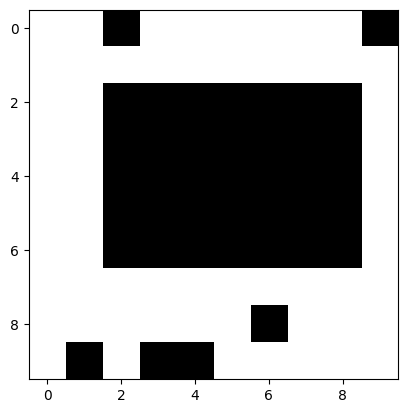

In [29]:
img = np.array(
    [
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    ],
    dtype='uint8',
)
plt.imshow(img)
plt.show()

[[0 1 1 1 0 0 0 0 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 0 0]]


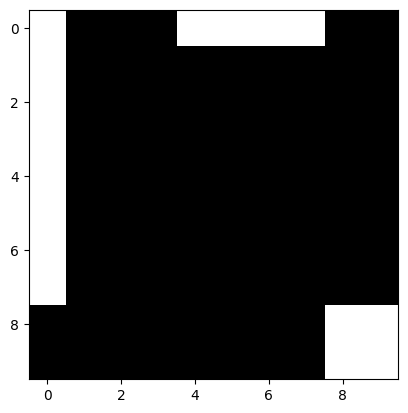

In [31]:
kernel = np.ones((3, 3), np.uint8)
dilated_img_custom = morph_transform(img, kernel, op='dilate')

print(dilated_img_custom)
plt.imshow(dilated_img_custom)
plt.show()

In [32]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated_img_cv_1 = cv2.dilate(img, kernel)
dilated_img_cv_2 = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel)

In [34]:
print(np.array_equal(dilated_img_custom, dilated_img_cv_1))
np.array_equal(dilated_img_custom, dilated_img_cv_2)

True


True

### opening

### closing


### gradient morfologiczny

### white/top hat

### black hat